<a href="https://colab.research.google.com/github/NgoThanhNha/Artificial_Intelligence/blob/main/W4_Fuzzy_Logic_Temperature_Control.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

75.00000000000001


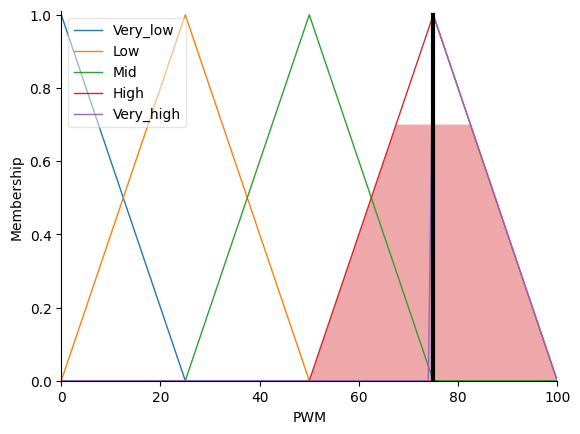

In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Setpoint = ctrl.Antecedent(np.arange(18,28,1),'Temp_Set')
PV = ctrl.Antecedent(np.arange(0,41,1),'Temp_PV')
PWM = ctrl.Consequent(np.arange(0,101,1),'PWM')

Setpoint['Very_low'] = fuzz.trimf(Setpoint.universe,[18,18,20])
Setpoint['Low'] = fuzz.trimf(Setpoint.universe,[18,20,22])
Setpoint['Mid'] = fuzz.trimf(Setpoint.universe,[20,22,25])
Setpoint['High'] = fuzz.trimf(Setpoint.universe,[23,25,27])
Setpoint['Very_high'] = fuzz.trimf(Setpoint.universe,[25,27,27])

PV['Very_low'] = fuzz.trimf(PV.universe,[0,0,10])
PV['Low'] = fuzz.trimf(PV.universe,[0,10,20])
PV['Mid'] = fuzz.trimf(PV.universe,[10,20,30])
PV['High'] = fuzz.trimf(PV.universe,[20,30,40])
PV['Very_high'] = fuzz.trimf(PV.universe,[30,30,40])

PWM['Very_low'] = fuzz.trimf(PWM.universe,[0,0,25])
PWM['Low'] = fuzz.trimf(PWM.universe,[0,25,50])
PWM['Mid'] = fuzz.trimf(PWM.universe,[25,50,75])
PWM['High'] = fuzz.trimf(PWM.universe,[50,75,100])
PWM['Very_high'] = fuzz.trimf(PWM.universe,[75,75,100])

rule1 = ctrl.Rule(Setpoint['Very_low']&PV['Very_low'],PWM['Low'])
rule2 = ctrl.Rule(Setpoint['Very_low']&PV['Low'],PWM['Low'])
rule3 = ctrl.Rule(Setpoint['Very_low']&PV['Mid'],PWM['Very_low'])
rule4 = ctrl.Rule(Setpoint['Very_low']&PV['High'],PWM['Very_low'])
rule5 = ctrl.Rule(Setpoint['Very_low']&PV['Very_high'],PWM['Very_low'])

rule6 = ctrl.Rule(Setpoint['Low']&PV['Very_low'],PWM['Mid'])
rule7 = ctrl.Rule(Setpoint['Low']&PV['Low'],PWM['Mid'])
rule8 = ctrl.Rule(Setpoint['Low']&PV['Mid'],PWM['Low'])
rule9 = ctrl.Rule(Setpoint['Low']&PV['High'],PWM['Very_low'])
rule10 = ctrl.Rule(Setpoint['Low']&PV['Very_high'],PWM['Very_low'])

rule11 = ctrl.Rule(Setpoint['Mid']&PV['Very_low'],PWM['High'])
rule12 = ctrl.Rule(Setpoint['Mid']&PV['Low'],PWM['Mid'])
rule13 = ctrl.Rule(Setpoint['Mid']&PV['Mid'],PWM['Mid'])
rule14 = ctrl.Rule(Setpoint['Mid']&PV['High'],PWM['Very_low'])
rule15 = ctrl.Rule(Setpoint['Mid']&PV['Very_high'],PWM['Very_low'])

rule16 = ctrl.Rule(Setpoint['High']&PV['Very_low'],PWM['High'])
rule17 = ctrl.Rule(Setpoint['High']&PV['Low'],PWM['High'])
rule18 = ctrl.Rule(Setpoint['High']&PV['Mid'],PWM['Mid'])
rule19 = ctrl.Rule(Setpoint['High']&PV['High'],PWM['Low'])
rule20 = ctrl.Rule(Setpoint['High']&PV['Very_high'],PWM['Very_low'])

rule21 = ctrl.Rule(Setpoint['Very_high']&PV['Very_low'],PWM['Very_high'])
rule22 = ctrl.Rule(Setpoint['Very_high']&PV['Low'],PWM['Very_high'])
rule23 = ctrl.Rule(Setpoint['Very_high']&PV['Mid'],PWM['High'])
rule24 = ctrl.Rule(Setpoint['Very_high']&PV['High'],PWM['High'])
rule25 = ctrl.Rule(Setpoint['Very_high']&PV['Very_high'],PWM['Mid'])


PWM_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
PWM_duty = ctrl.ControlSystemSimulation(PWM_ctrl)
PWM_duty.input['Temp_Set'] = 27
PWM_duty.input['Temp_PV'] = 27
PWM_duty.compute()
print(PWM_duty.output['PWM'])
PWM.view(sim=PWM_duty)